In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [21]:
customers = pd.read_csv('/content/drive/MyDrive/ds/olist_customers_dataset.csv')
items = pd.read_csv('/content/drive/MyDrive/ds/olist_order_items_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/ds/olist_orders_dataset.csv')

In [22]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [23]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [24]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Сколько у нас пользователей, которые совершили покупку только один раз?

In [25]:
orders_delivered = orders[orders['order_status'] == 'delivered']
uniq_customers = customers[['customer_id', 'customer_unique_id']]
orders_uniq_id = pd.merge(orders_delivered, uniq_customers, on = 'customer_id')
orders_uniq_id.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6


In [26]:
orders_uniq_id.groupby('customer_unique_id').agg({'order_id': 'count'}).rename(columns = {'order_id': 'amount'})\
                                                                        .query('amount == 1').shape[0]

90557

Сколько заказов в месяц в среднем не доставляется по разным причинам?

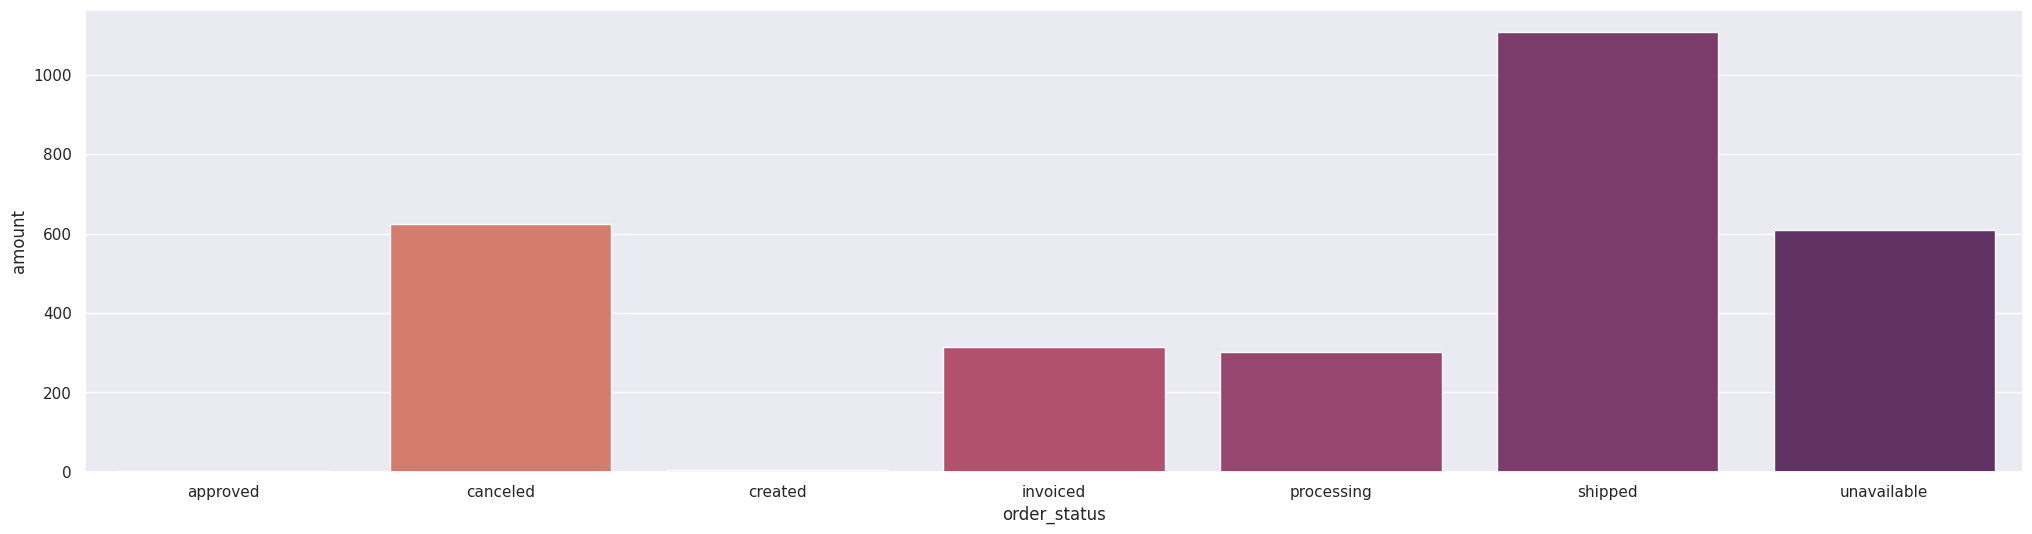

In [88]:
orders_not_delivered = orders[orders['order_status'] != 'delivered']
status = orders_not_delivered.groupby('order_status', as_index = False).agg({'order_id':'count'}).rename(columns={'order_id':'amount'})

sns.barplot(data = status, x = status['order_status'], y = status['amount'], palette = 'flare');



In [28]:
orders_not_delivered['estimated_delivery'] = pd.to_datetime(orders_not_delivered['order_estimated_delivery_date'])
orders_not_delivered['estimated_delivery'] = orders_not_delivered.estimated_delivery.apply(lambda x: x.strftime('%Y-%m'))


In [29]:
monthly_orders = orders_not_delivered.groupby(['estimated_delivery', 'order_status'], as_index = False).agg({'order_id':'count'}).query('order_status in ("canceled", "unavailable")').rename(columns = {'order_id': 'amount'})

avg_per_month = monthly_orders.groupby('order_status', as_index = False).agg({'amount':'mean'}).round(2)
avg_per_month.head()

,order_status,amount
0,canceled,24.04
1,unavailable,29.00


По каждому товару определить, в какой день недели товар чаще всего покупается

In [30]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [31]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [32]:
orders_items = pd.merge(orders, items)
orders_items.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [33]:
orders_items['order_purchase_timestamp'] = pd.to_datetime(orders_items['order_purchase_timestamp'])
orders_items['day_of_the_week'] = orders_items['order_purchase_timestamp'].dt.day_name()


In [34]:
by_day = orders_items.groupby(['product_id','day_of_the_week'], as_index = False).agg({'price':'count'})

by_day.pivot(index='product_id', columns='day_of_the_week', values='price').idxmax(axis = 1).reset_index().rename(columns = {0:'most_popular_day'}).head()

,product_id,most_popular_day
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday


Построй RFM-кластеры для пользователей. Выведи для каждого кластера средние значения метрик R, F, M

In [35]:
cust_orders = pd.merge(customers, orders)
cust_orders = pd.merge(cust_orders, items)[['customer_unique_id', 'price', 'order_purchase_timestamp', 'order_id', 'order_status']]

cust_orders = cust_orders.query('order_status == "delivered"')


In [36]:
cust_orders['order_purchase_timestamp'] = pd.to_datetime(cust_orders['order_purchase_timestamp'])
date_max = max(cust_orders.order_purchase_timestamp) + timedelta(days=1)



RFM:

R(Recency) - дельта, которая показывает, когда была совершена последняя покупка

F(frequency) - число заказов на одного пользователя

M(monetary) - потраченная сумма пользователем


In [37]:
recency = cust_orders.groupby('customer_unique_id', as_index = False).agg({'order_purchase_timestamp': lambda x: (date_max - x.max()).days})\
                                                                     .rename(columns = {'order_purchase_timestamp': 'recency'})
recency['recency'] = recency['recency'].astype('int16')

frequency = cust_orders.groupby('customer_unique_id', as_index = False).agg({'order_status':'count'}).rename(columns = {'order_status':'frequency'})

monetary = cust_orders.groupby('customer_unique_id', as_index = False).agg({'price':'sum'}).rename(columns = {'price':'monetary'})



In [38]:
rfm = pd.merge(recency, frequency)
rfm = pd.merge(rfm, monetary)


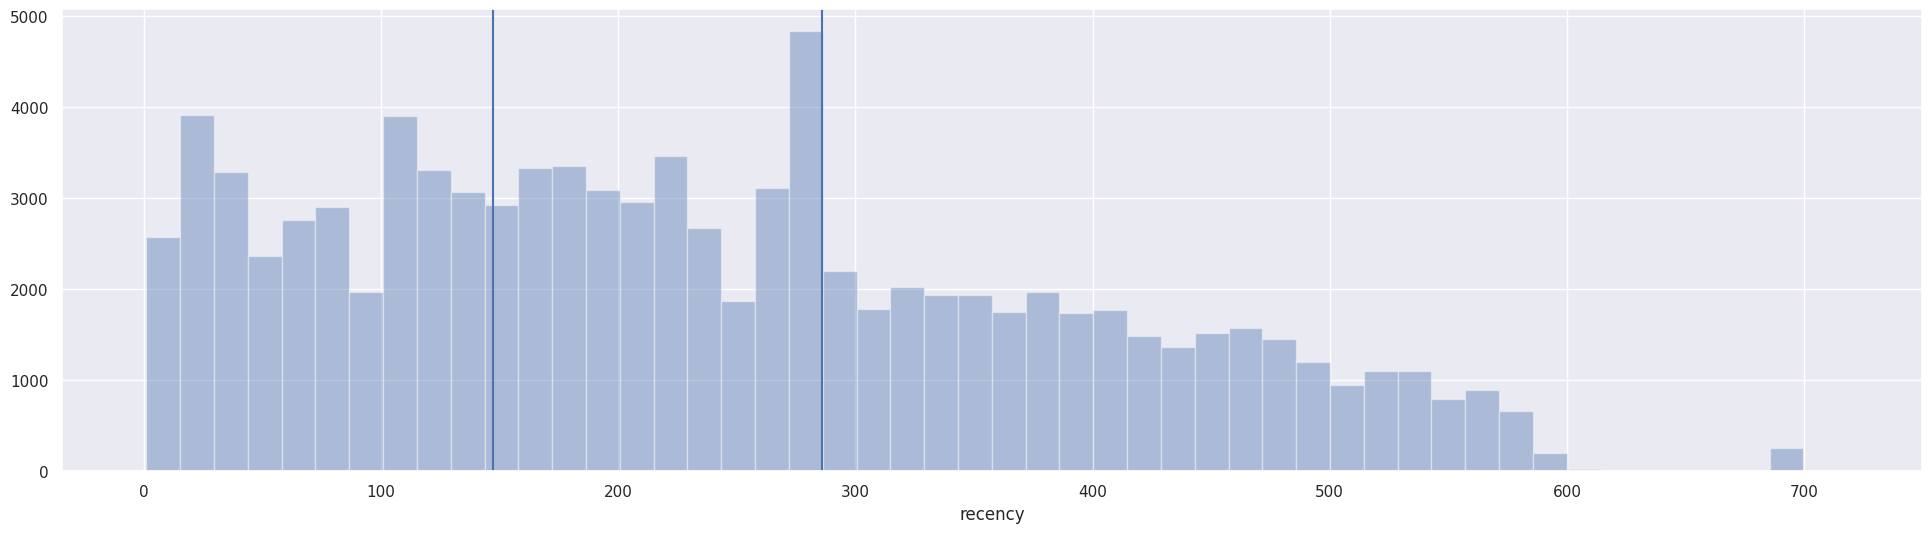

In [39]:

sns.set(rc={'figure.figsize':(24, 6)})
sns.distplot(rfm['recency'], kde = False)

quantile_1 = rfm['recency'].quantile(q=0.33)
quantile_2 = rfm['recency'].quantile(q=0.66)

plt.axvline(quantile_1)
plt.axvline(quantile_2);

Разобью пользователей на три категории, опираясь на квантили(0.33 и 0.66)

In [40]:
def recency(recency):
  if recency <= quantile_1:
    return 1
  if recency >= quantile_2:
    return 3
  return 2

rfm['r'] = rfm['recency'].apply(recency)


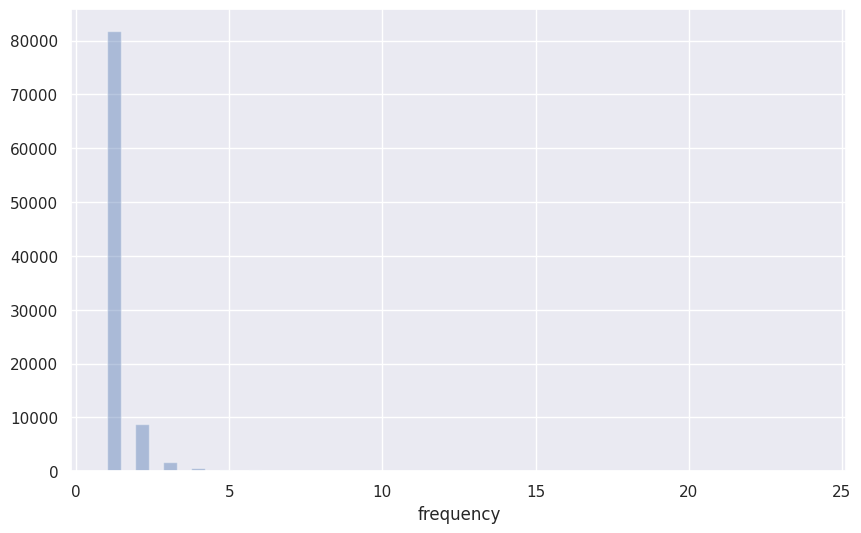

In [77]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.distplot(rfm['frequency'], kde = False);


Тоже самое проделаю с frequency

In [45]:
def frequency(frequency):
  if frequency == 1:
    return 1
  if frequency == 2:
    return 2
  return 3

rfm['f'] = rfm['frequency'].apply(frequency)
rfm.head()

,customer_unique_id,recency,frequency,monetary,r,f
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,1,1
2,0000f46a3911fa3c0805444483337064,537,1,69.00,3,1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,3,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,3,1


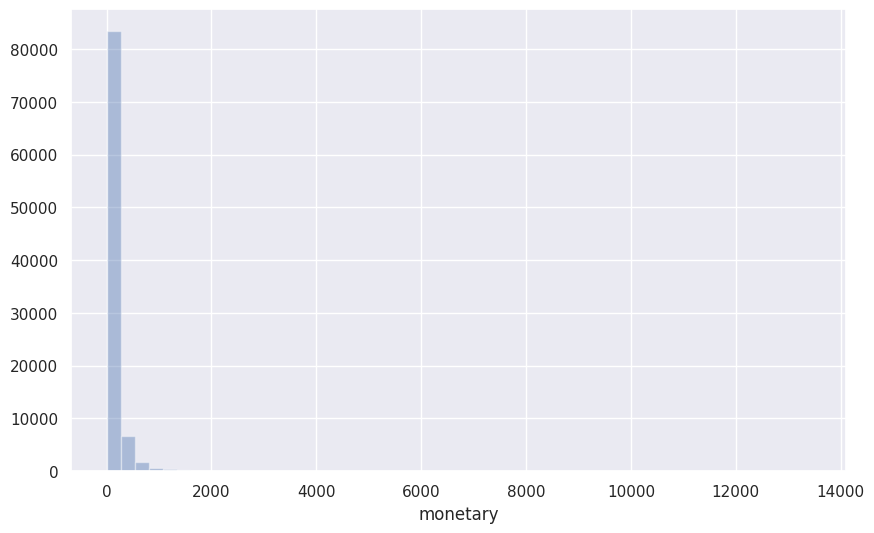

In [46]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.distplot(rfm['monetary'], kde = False);

И с monetary

In [48]:
def monetary(monetary):
  if monetary <= 100:
    return 1
  if monetary >= 1000:
    return 3
  return 2

rfm['m'] = rfm['monetary'].apply(monetary)


,customer_unique_id,recency,frequency,monetary,r,f,m
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,1,1,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,1,1,1
2,0000f46a3911fa3c0805444483337064,537,1,69.00,3,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,3,1,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,3,1,2


In [51]:
rfm['rfm'] = rfm['r'].astype(str) + rfm['f'].astype(str) + rfm['m'].astype(str)

rfm.head()

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,1,1,2,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,1,1,1,111
2,0000f46a3911fa3c0805444483337064,537,1,69.00,3,1,1,311
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,3,1,1,311
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,3,1,2,312


In [59]:
rfm_grouped = rfm.groupby('rfm', as_index = False).agg({'recency':'mean', 'frequency':'mean', 'monetary':'mean'})
rfm_grouped.head()


,rfm,recency,frequency,monetary
0,111,74.076865,1.0,52.453814
1,112,75.938450,1.0,215.917590
2,113,78.807407,1.0,1643.122852
3,121,76.237689,2.0,64.218712
4,122,76.443052,2.0,235.881831


In [70]:
rfm_graph = rfm.groupby('rfm', as_index = False).agg({'customer_unique_id':'count'}).rename(columns = {'customer_unique_id':'amount'})

rfm_graph.head()

,rfm,amount
0,111,15989
1,112,10658
2,113,270
3,121,1056
4,122,1835


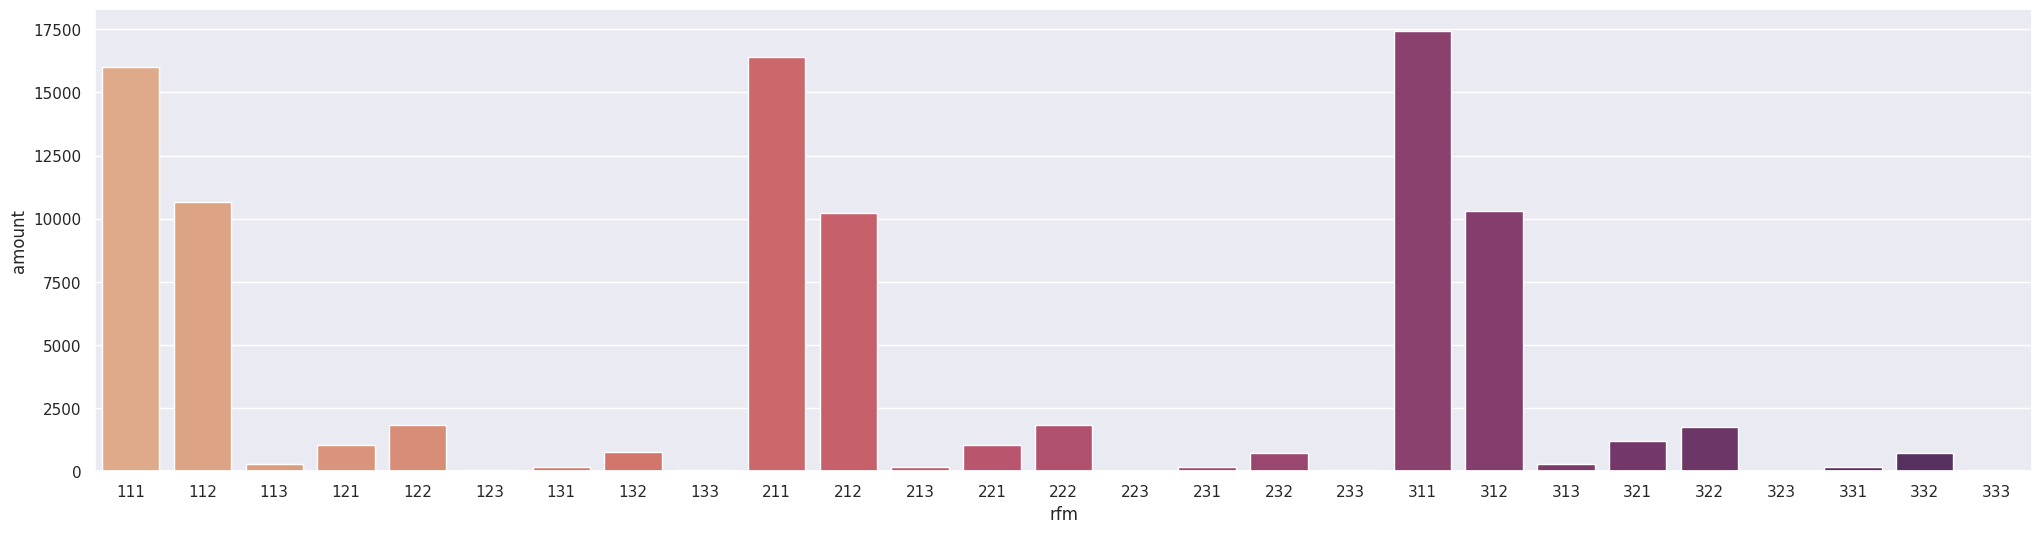

In [87]:
sns.set(rc={'figure.figsize':(25, 6)})
sns.barplot(x = rfm_graph['rfm'], y = rfm_graph['amount'], palette = 'flare');